In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Default= pd.read_csv('https://github.com/pykale/transparentML/raw/main/data/Default.csv')
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
Default.shape

(10000, 4)

In [ ]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [ ]:
Default.isnull().sum()

,0
default,0
student,0
balance,0
income,0


In [ ]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


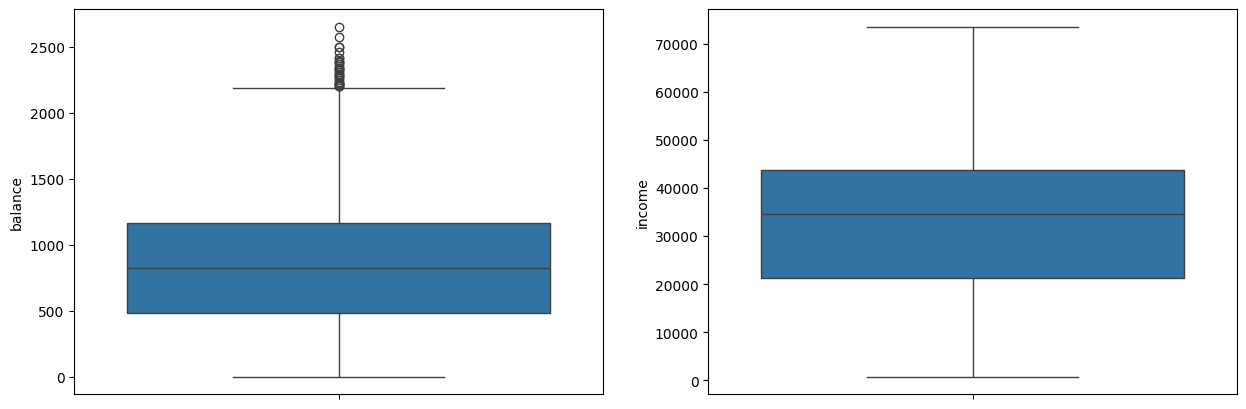

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

Catorigal ka

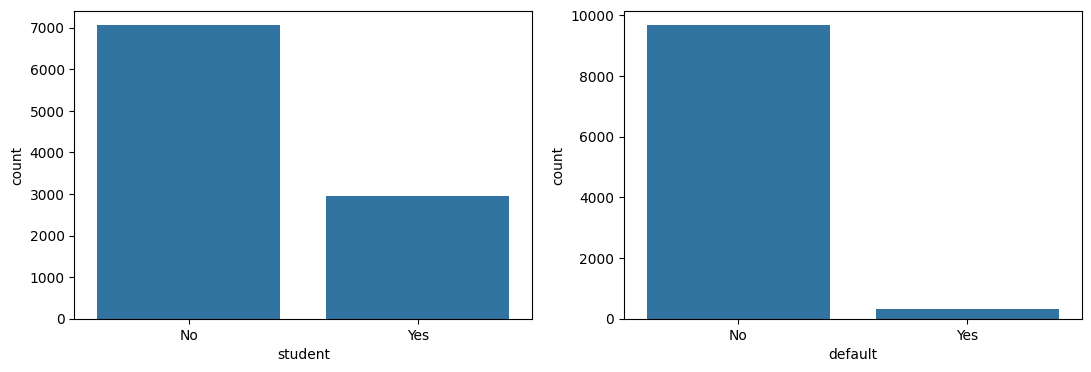

In [ ]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(x=Default['student'])

plt.subplot(1,2,2)
sns.countplot(x=Default['default'])
plt.show()

In [ ]:
Default['student'].value_counts()

,count
student,
No,7056
Yes,2944


In [ ]:
Default['default'].value_counts()

,count
default,
No,9667
Yes,333


In [ ]:
Default['student'].value_counts(normalize=True)

,proportion
student,
No,0.7056
Yes,0.2944


In [ ]:
Default['default'].value_counts(normalize=True)

,proportion
default,
No,0.9667
Yes,0.0333


In [ ]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


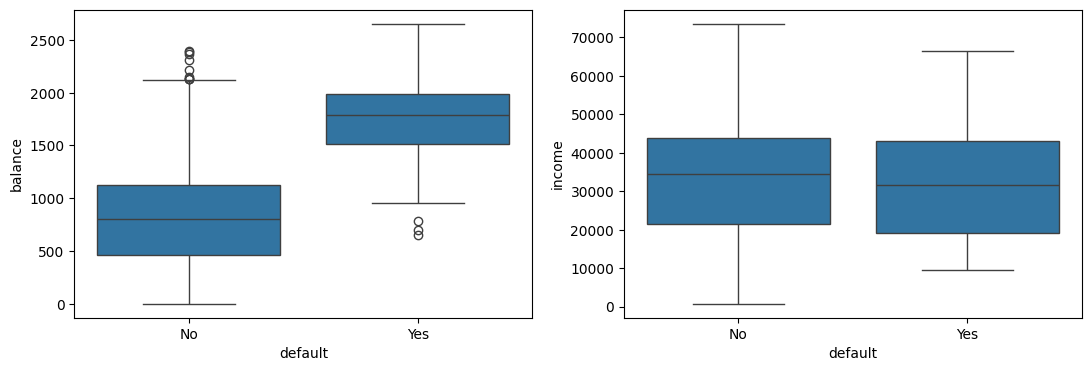

In [ ]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.boxplot(x=Default['default'],y=Default['balance'])


plt.subplot(1,2,2)
sns.boxplot(x=Default['default'],y=Default['income'])
plt.show()

In [ ]:
pd.crosstab(Default['default'],Default['student'])

student,No,Yes
default,,
No,6850,2817
Yes,206,127


In [ ]:
pd.crosstab(Default['default'],Default['student'],normalize=True).round(2)

student,No,Yes
default,,
No,0.68,0.28
Yes,0.02,0.01


correation map

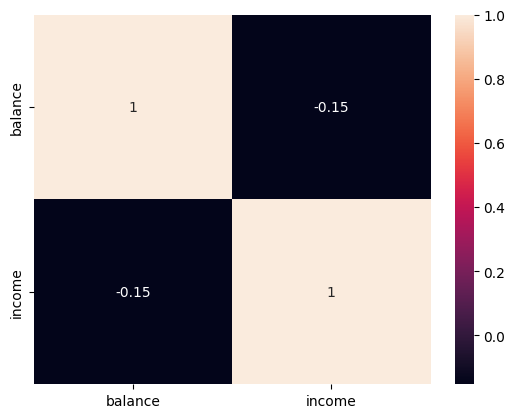

In [ ]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

finding outliers

In [ ]:
Q1 , Q3 = np.percentile(Default['balance'],[25,75])
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
Upper_limit = Q3 + (1.5 * IQR)

In [ ]:
Upper_limit

np.float64(2193.174308607817)

In [ ]:
lower_limit

np.float64(-545.1348170774612)

In [ ]:
df= Default[Default['balance'] > Upper_limit]

In [ ]:
df

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [ ]:
df['default'].count()

np.int64(31)

In [ ]:
df['default'].value_counts(normalize=True)

,proportion
default,
Yes,0.83871
No,0.16129


In [ ]:
df['default'].value_counts()

,count
default,
Yes,26
No,5


In [ ]:
Default['balance']=np.where(Default['balance'] > Upper_limit, lower_limit, Default['balance'])

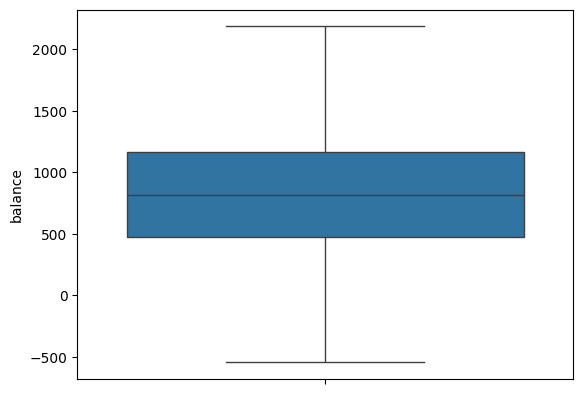

In [ ]:
# No outlier show
sns.boxplot(y=Default['balance'])
plt.show()

In [ ]:
# chage yes/no to 0 and 1

In [ ]:
Default = pd.get_dummies(Default,drop_first=True)

In [ ]:
# Ensure bool → int
Default['default_Yes'] = Default['default_Yes'].astype(int)
Default['student_Yes'] = Default['student_Yes'].astype(int)

In [ ]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [ ]:
Default.rename(columns={'default_Yes':'default','student_Yes' : 'Students'},inplace=True)

In [ ]:
Default.head()

,balance,income,default,Students
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Default.drop('default',axis=1)
y = Default['default']

In [ ]:
X

,balance,income,Students
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0
...,...,...,...
9995,711.555020,52992.378914,0
9996,757.962918,19660.721768,0
9997,845.411989,58636.156984,0
9998,1569.009053,36669.112365,0


In [ ]:
y

,default
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42 , stratify=y)

In [ ]:
print(X_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [ ]:
print(y_train.value_counts(normalize=True))
print(' ')
print(y_test.value_counts(normalize=True))

default
0    0.966714
1    0.033286
Name: proportion, dtype: float64
 
default
0    0.966667
1    0.033333
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy='minority')

In [ ]:
X_res , y_res = sm.fit_resample(X_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_res,y_res)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
cunfusion_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>